In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pickle

In [2]:
data = pd.read_csv("data/Mall_Customers.csv")
clusters = [2, 3, 4, 5, 6]
data_numeric = data.drop(["CustomerID", "Gender"], axis=1)

In [3]:
# Scale data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_numeric)

In [4]:
# Train PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_scaled)

In [5]:
# Save PCA Model
with open("../models/pca.pkl", "wb") as file:
    pickle.dump(pca, file)

/home/kevin/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


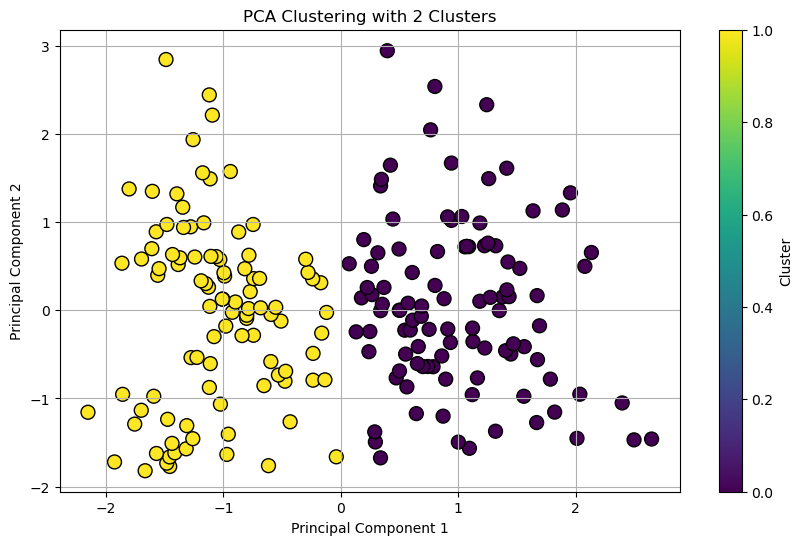

/home/kevin/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


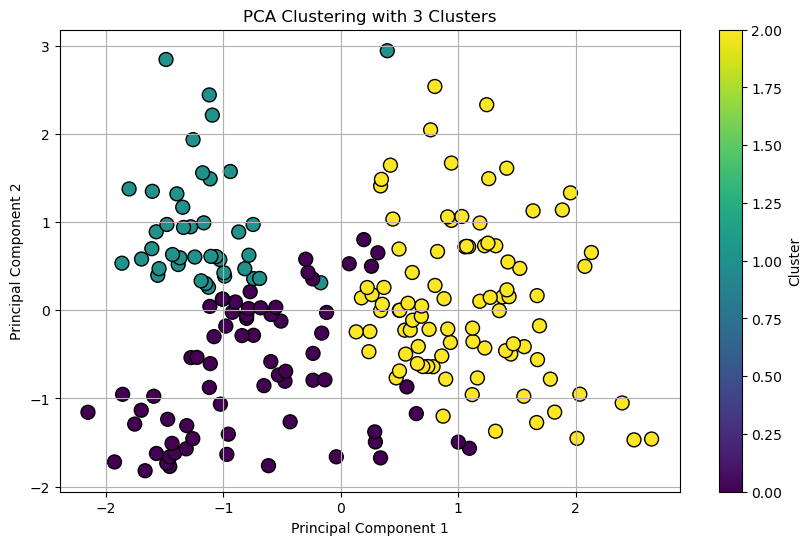

/home/kevin/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


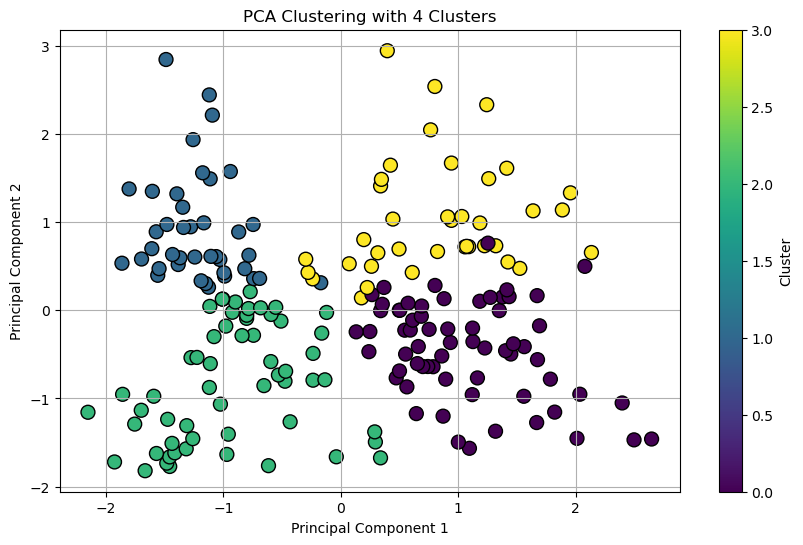

/home/kevin/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


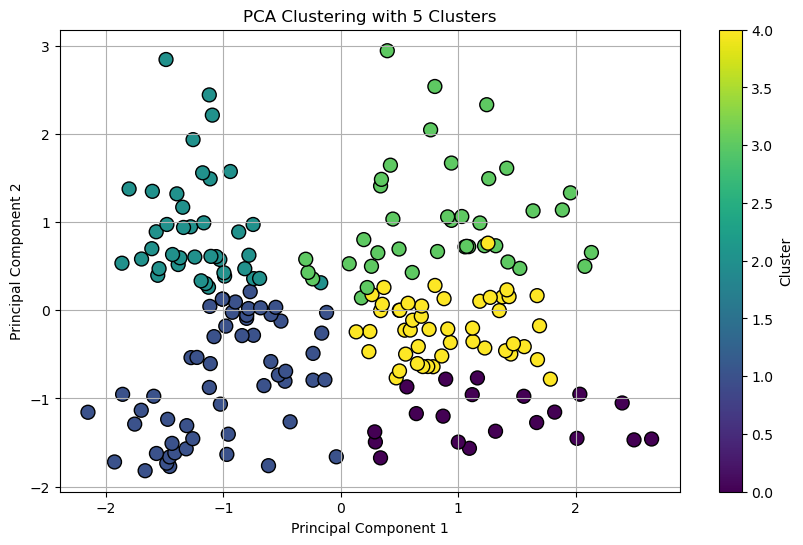

/home/kevin/miniconda3/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


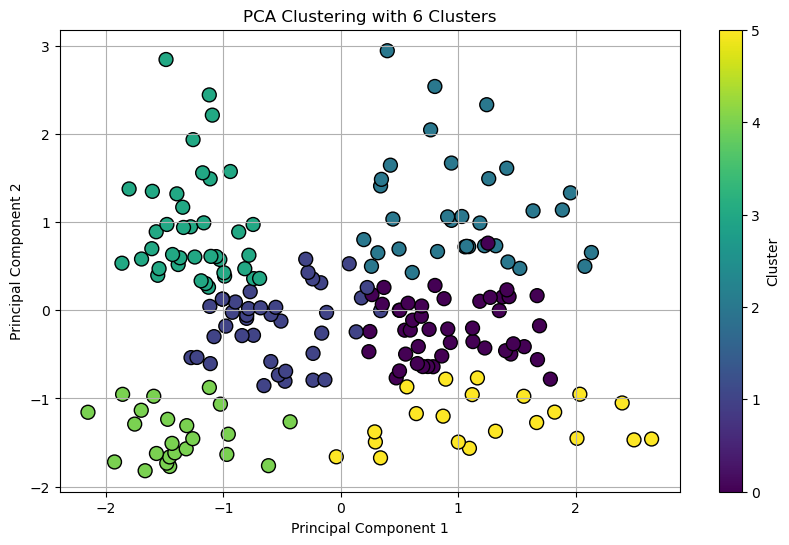

In [6]:
# Train KMeans models and visualize
for num_clusters in clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(data_scaled)

    pca_df = pd.DataFrame(principal_components, columns=["PC1", "PC2"])
    pca_df["Cluster"] = kmeans.labels_

    plt.figure(figsize=(10, 6))
    plt.scatter(
        pca_df["PC1"],
        pca_df["PC2"],
        c=pca_df["Cluster"],
        cmap="viridis",
        edgecolor="k",
        s=100,
    )
    plt.title(f"PCA Clustering with {num_clusters} Clusters")
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")
    plt.colorbar(label="Cluster")
    plt.grid(True)
    plt.show()

In [7]:
# Save the last KMeans model
with open("../backend/endpoints/models/kmeans.pkl", "wb") as file:
    pickle.dump(kmeans, file)